<a href="https://colab.research.google.com/github/noahkarsky/Geoscience_Disciplines/blob/master/Geologic_branches_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install umap-learn[plot]

In [ ]:
pip install hdbscan

     |████████████████████████████████| 4.7MB 2.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2301755 sha256=61303939d0dc0c93f0d53cb82ca05d6248ea2951be952b9a13c427b10b09db72
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import umap
import umap.plot
import hdbscan
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.spatial.distance import cdist
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv(r"/content/drive/My Drive/DataStuff/Geo_Branches/Parsed_wiki_data.csv", names=["index","related_word","discipline"],skiprows=[0])

In [ ]:
df.head()

,index,related_word,discipline
0,0,Geology,Physical Geology
1,1,(from,Physical Geology
2,2,Ancient,Physical Geology
3,3,Greek,Physical Geology
4,4,"γῆ,",Physical Geology


In [ ]:
#this will make each discipline into a row and the new column will be called the article_text
df1 = df.groupby('discipline')['related_word'].apply(list).reset_index(name='article_text')
df1['text'] = df1.article_text.astype(str).str.replace('\[|\]|\'', '').str.replace(',','')

In [ ]:
df1.head()

,discipline,article_text,text
0,Agricultural Meteorology,"[Meteorology, branch, atmospheric, sciences, i...",Meteorology branch atmospheric sciences includ...
1,Applied Climatology,"[Climatology, (from, Greek, κλίμα,, klima,, ""p...","Climatology (from Greek κλίμα klima ""place zon..."
2,Applied geomorphology,"[The, Chambal, geographical, cultural, region,...",The Chambal geographical cultural region north...
3,Archaeological Palynology,"[Palynology, literally, ""study, dust"", (from, ...","Palynology literally ""study dust"" (from Greek:..."
4,Asteroseismology,"[Asteroseismology, study, oscillations, stars....",Asteroseismology study oscillations stars. nan...


In [ ]:
vectorizer = CountVectorizer(min_df=5, stop_words='english')
word_doc_matrix = vectorizer.fit_transform(df1.text)

In [ ]:
mapper = umap.UMAP(n_neighbors=10, metric='cosine', min_dist=0.1, random_state=42).fit_transform(word_doc_matrix)

In [ ]:
embedding = pd.DataFrame(mapper, columns = ['x','y'])
embedding.shape

(146, 2)

Trying some KMeans on the samples

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(mapper)
    kmeanModel.fit(mapper)
    distortions.append(sum(np.min(cdist(mapper, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / mapper.shape[0])

In [ ]:
kmeans_labels = cluster.KMeans(n_clusters=4).fit_predict(mapper)

Trying some HBDSCAN on the samples

In [ ]:

clusterer = hdbscan.HDBSCAN()
clusterer.fit(mapper)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

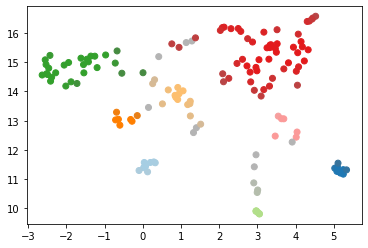

In [ ]:
pal = sns.color_palette('Paired', 87)
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(clusterer.labels_,clusterer.probabilities_)]
plt.scatter(embedding.x, embedding.y, c=colors,)

In [ ]:
fig = px.scatter(embedding,x='x',y='y',color=colors,hover_data=['title'],width=800, height=800)

ValueError: ignored

In [ ]:
clusterer.labels_.max()

7

In [ ]:
embedding['cluster'] = clusterer.labels_

In [ ]:
fig = px.scatter(embedding,x='x',y='y',color='cluster',hover_data=['title'],width=800, height=800)
fig.show()

In [ ]:
34


clusterer = hdbscan.HDBSCAN(min_cluster_size=25,min_samples=15,gen_min_span_tree=True)
clusterer.fit(mapper)
XCLUST = clusterer.labels_
clusternum = len(set( clusterer.labels_))-1
#samples.append(clusternum)

dfclust = pd.DataFrame(XCLUST)
dfclust.columns = ['cluster']

print(clusternum)
# embeddingC = pd.concat([embedding,dfclust], axis=1, join_axes=[embedding.index])
# display(embeddingC)

0


In [ ]:
embedding['title'] = df1.discipline
embedding['cluster'] = kmeans_labels

In [ ]:

fig = px.scatter(embedding,x='x',y='y',color='cluster',hover_data=['title'],width=800, height=800)
fig.show()

In [ ]:
3

3